# CODE TO ASSESS THE EFFECTS OF MICROPLASTICS ON GROWTH PATTERN, BODY CONDITION AND GENE EXPRESSION OF ANY FISH
    #Code also checks if there is significant difference in growth between treatment groups following microplastics exposure
    #Creates a volcano plot followed by the names of up/downregulated genes (data does not relate to fish)
    #weight in grams 
    #length in mm
    

In [60]:
#libraries for the analyisis
import pandas as pd
import seaborn as sns
import numpy as np
import os
import scipy
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats


In [61]:
print("Current Working Directory:", os.getcwd()) #getting working direrctory

Current Working Directory: C:\Users\c24024960\OneDrive - Cardiff University\Desktop\SWBIO\Data Science and Machine learning\Python\Data_analyisis


# CACULATION OF THE EFFECTS OF MNPS ON GROWTH  PATTERN AND BODY CONDITION, OF FISH SPECIES A
   

In [62]:
#importing hypothetical data
#mnps to mean micro/nanoplastics hereafter.

In [32]:
mnps = pd.read_csv("Microplastics1.csv") #reading csv data file
mnps = mnps.drop(mnps.columns[0], axis=1) #dropping columns just to organize the dataset
mnps.head() #viewing the first 5 rows with all the columns of the dataset

,Control_Weight,Control_Length,1 PE MPs/mL_Weight,1 PE MPs/mL_Length,10 PE MPs/mL_Weight,10 PE MPs/mL_Length,100 PE MPs/mL_Weight,100 PE MPs/mL_Length
0,10.0000,10.0000,10.0000,10.0000,10.0000,10.0000,10.0000,10.0000
1,12.0304,10.6624,14.1925,11.2657,12.4839,10.7925,15.6117,11.5861
2,12.2885,10.7411,14.4442,11.3263,12.6366,10.8410,15.8678,11.6432
3,12.5317,10.8149,14.6898,11.3842,12.7807,10.8878,16.1147,11.6976
4,12.7834,10.8893,14.9380,11.4410,12.9281,10.9340,16.3698,11.7516


    ##exploring data
    remove "#" to run the codes below

In [5]:
#mnps.corr()    #checking for correlation among the treatments (remove "#" to run the code)

In [6]:
#from pandas.plotting import scatter_matrix

#a = scatter_matrix(mnps, figsize=(16, 16))
#a

In [33]:
#summarizing the dasta
mnps.describe()

,Control_Weight,Control_Length,1 PE MPs/mL_Weight,1 PE MPs/mL_Length,10 PE MPs/mL_Weight,10 PE MPs/mL_Length,100 PE MPs/mL_Weight,100 PE MPs/mL_Length
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,13.676224,11.121694,15.692388,11.636476,13.386765,11.123824,17.051818,11.855053
std,1.489749,0.426074,1.856773,0.586161,1.118889,0.468169,2.159220,0.528778
min,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
25%,12.783400,10.889300,14.938000,11.441000,12.928100,10.934000,16.369800,11.751600
50%,13.783700,11.167700,15.925800,11.657500,13.511300,11.115700,17.357000,11.955600
75%,14.780100,11.433200,16.913200,11.862600,14.093700,11.292000,18.341400,12.147300
max,15.776300,11.685000,17.898700,13.061000,14.929000,12.420100,19.579700,12.314300


## 1. GROWTH PATTERN

1. The length–weight relationship equation for any fish is given by W=aL**b, where W = Weight, L = Length, a and b are coefficients 
2. Conversion of length and weight to log to estimate the parameters a and b
3. Parameter b, the slope, is used to determine the growth pattern compared with the control.

In [40]:
mnps_log = np.log(mnps) #converting the variable to natural log to enalbe the extimation of the slope

In [41]:
mnps_log.head()

,Control_Weight,Control_Length,1 PE MPs/mL_Weight,1 PE MPs/mL_Length,10 PE MPs/mL_Weight,10 PE MPs/mL_Length,100 PE MPs/mL_Weight,100 PE MPs/mL_Length
0,2.302585,2.302585,2.302585,2.302585,2.302585,2.302585,2.302585,2.302585
1,2.487437,2.366724,2.652714,2.421763,2.524440,2.378851,2.748021,2.449806
2,2.508664,2.374078,2.670293,2.427127,2.536597,2.383335,2.764292,2.454722
3,2.528261,2.380925,2.687153,2.432226,2.547936,2.387643,2.779732,2.459384
4,2.548147,2.387781,2.703908,2.437203,2.559403,2.391877,2.795438,2.463989


In [42]:
#InitialziNG two dictionaries to contain different type of growth per treatmennts and body condition
type_growth = {}
body_condition = {}

In [43]:
#Perform linear regression on each treatment
#Control
x = mnps_log['Control_Length']
y = mnps_log['Control_Weight']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the plot
sns.set_theme()
#remove the "#" to visualzie the plot
#sns.regplot(data=mnps_log, x=x, y=y, fit_reg=True)

# Add the regression equation as text
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}"
#remove the "#" to visualzie the plot
#plt.text(x.min(), y.max(), equation, fontsize=12, color='blue')

slope_control = round(slope,2)
type_growth["Control"] = slope_control
#Remove "#" to show theh slope
#print(slope_control)
# Show the plot by removing "#" from the code below
#plt.show()



# Perform linear regression on second treatment
x = mnps_log['1 PE MPs/mL_Length']
y = mnps_log['1 PE MPs/mL_Weight']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the plot
sns.set_theme()
#remove the "#" to visualzie the plot
#sns.regplot(data=mnps_log, x=x, y=y, fit_reg=True)

# Add the regression equation as text
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}"
#remove the "#" to visualzie the plot
#plt.text(x.min(), y.max(), equation, fontsize=12, color='blue')

slope_1_PE = round(slope,2)
type_growth["1_PE"] = slope_1_PE
#Remove "#" to show theh slope
#print(slope_1_PE)
#Show the plot by removing "#" from the code below
#plt.show()



# Perform linear regression on third treatment
x = mnps_log['10 PE MPs/mL_Length']
y = mnps_log['10 PE MPs/mL_Weight']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the plot
sns.set_theme()
#remove the "#" to visualzie the plot
#sns.regplot(data=mnps_log, x=x, y=y, fit_reg=True)

# Add the regression equation as text
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}"
#remove the "#" to visualzie the plot
#plt.text(x.min(), y.max(), equation, fontsize=12, color='blue')

slope_10_PE = round(slope,2)
type_growth["10_PE"] = slope_10_PE
#Remove "#" to show theh slope
#Remove "#" to show theh slope
#print(slope_10_PE)
#Show the plot by removing "#" from the code below
#plt.show()


# Perform linear regression on fourth treatment
x = mnps_log['100 PE MPs/mL_Length']
y = mnps_log['100 PE MPs/mL_Weight']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the plot
sns.set_theme()
#remove the "#" to visualzie the plot
#sns.regplot(data=mnps_log, x=x, y=y, fit_reg=True)

# Add the regression equation as text
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}"
#remove the "#" to visualzie the plot
#plt.text(x.min(), y.max(), equation, fontsize=12, color='blue')

slope_100_PE = round(slope,2)
type_growth["100_PE"] = slope_100_PE
#Remove "#" to show theh slope
#print(slope_100_PE)
#Show the plot by removing "#" from the code below
#plt.show()





Summary of growth patterns

In [44]:
#summary of the type of growth pattern observed under diffrernt treatment conditioins
for key, value in type_growth.items():
    if value > 3:
        print(f"{key}, {value}, Positive Allometric growth")
    if value < 3:
        print(f"{key}, {value}, Negative Allometric growth")
    if value == 3:
        print(f"{key}, {value}, Positive Allometric growth")

Control, 2.94, Negative Allometric growth
1_PE, 2.45, Negative Allometric growth
10_PE, 1.96, Negative Allometric growth
100_PE, 3.17, Positive Allometric growth


## 2. BODY CONDITION FACTOR (K)

Control,: 1.43
k_1PE ,: 3.84
k_10_PE,: 11.91
k_100PE,: 0.67


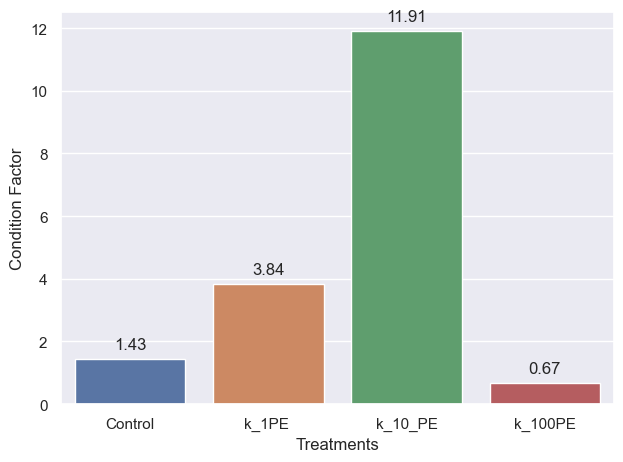

In [45]:
# K shows the degree of wellbeing of the fish unnder experimental conditions 
#Fulton’s equation, K = 100W/ Lb
#K = condition factor
#W = the weight of the fish in gram (g), used average weight per treatment to calculate body condition
#L = the total length of the fish in centimeters (cm) and average length
# b = the value obtained from the length-weight equation

#calculating body condtion per treatment
for key, value in type_growth.items():
    if key == "Control":
        k_c = 100 * mnps['100 PE MPs/mL_Weight'].mean() / mnps["Control_Length"].mean() ** value
        body_condition["Control"] = round(k_c,2)
       
    if key == "1_PE":
        k_1PE = 100 * mnps['1 PE MPs/mL_Weight'].mean() / mnps["1 PE MPs/mL_Length"].mean() ** value
        body_condition["k_1PE "] = round(k_1PE,2)
        
    if key == "10_PE":
        k_10_PE = 100 * mnps['10 PE MPs/mL_Weight'].mean() / mnps["10 PE MPs/mL_Length"].mean() ** value
        body_condition["k_10_PE"] = round(k_10_PE,2)
        
    if key == "100_PE":
        k_100PE = 100 * mnps['100 PE MPs/mL_Weight'].mean() / mnps["100 PE MPs/mL_Length"].mean() ** value
        body_condition["k_100PE"] =  round(k_100PE,2)
        
#creating a dictionaty with body condtion per treatment
for i,j in body_condition.items():
    print(f"{i},: {j}")

#creating a dataframe to plot bobody_condition per treatment
mnps_plot = pd.DataFrame(list(body_condition.items()), columns=["Treatments", "Condition factor"])
mnps_plot

#creating a barplot of body condition per treatment
# Create the bar plot
plot_PE = sns.barplot(x="Treatments", y="Condition factor", data=mnps_plot, hue=mnps_plot['Treatments'])

# Add value labels
for p in plot_PE.patches:
    height = p.get_height()
    plot_PE.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points')

# adding labels to the plot
plt.xlabel("Treatments")
plt.ylabel("Condition Factor")
#plt.title("Comparison of Condition Factors Across Treatments")

sns.set_theme()
plt.tight_layout()
plt.show()

## 3. SIGNIFICANT DIFFERENCE IN GROWTH BETWEEN THE TREATMENTS

In [47]:
#creation of dataframe with growth variabble among trietments
mnps_aov = pd.DataFrame(mnps[["Control_Weight", "1 PE MPs/mL_Weight", "10 PE MPs/mL_Weight", "100 PE MPs/mL_Weight"]]) 

In [48]:
mnps_aov.head() #viewing first five rows of the dataframe

,Control_Weight,1 PE MPs/mL_Weight,10 PE MPs/mL_Weight,100 PE MPs/mL_Weight
0,10.0000,10.0000,10.0000,10.0000
1,12.0304,14.1925,12.4839,15.6117
2,12.2885,14.4442,12.6366,15.8678
3,12.5317,14.6898,12.7807,16.1147
4,12.7834,14.9380,12.9281,16.3698


# I utilize one way anova to show the functionality of the code even though the assumptions were not met 
# There is a seperate code to undertake Kruskal-Wallis test in the same script.

## A. One_Way Anova

In [49]:
#Carryinng out oneway analysis of variance to assess the effects of mnps on the growth of fish
mnps_aovm= pd.melt(mnps_aov.reset_index(), id_vars=['index'], value_vars=['Control_Weight','1 PE MPs/mL_Weight', '10 PE MPs/mL_Weight', '100 PE MPs/mL_Weight'])
mnps_aovm.columns = ['index', 'Treatments', 'Value']
#Droping columns based on index positions
mnps_aovm= mnps_aovm.drop(mnps_aovm.columns[0], axis=1)
#Creating anova table for treatments
import statsmodels.api as sm
from statsmodels.formula.api import ols #used to generate anova results table

# carrying out ordinary Least Squares (ols)  model on the four mnps treatmens
mnps_model = ols('Value ~ C(Treatments)', data=mnps_aovm).fit()
mnps_anova_table = sm.stats.anova_lm(mnps_model, typ=2) # create anova table
mnps_anova_table #call to view the anove results in a nice table

,sum_sq,df,F,PR(>F)
C(Treatments),153.594590,3.0,17.683363,1.802281e-08
Residual,185.297596,64.0,NaN,NaN


## B. POST HOC TEST

In [50]:
#perform multiple pairwise comparison using Tukey's HSD to determine the actual treatments which we significantly different
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(mnps_aovm['Value'], mnps_aovm['Treatments'])
print(tukey_results)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
  1 PE MPs/mL_Weight  10 PE MPs/mL_Weight  -2.3056 0.0011 -3.8451 -0.7661   True
  1 PE MPs/mL_Weight 100 PE MPs/mL_Weight   1.3594 0.1021 -0.1801  2.8989  False
  1 PE MPs/mL_Weight       Control_Weight  -2.0162 0.0053 -3.5557 -0.4767   True
 10 PE MPs/mL_Weight 100 PE MPs/mL_Weight   3.6651    0.0  2.1255  5.2046   True
 10 PE MPs/mL_Weight       Control_Weight   0.2895 0.9597 -1.2501   1.829  False
100 PE MPs/mL_Weight       Control_Weight  -3.3756    0.0 -4.9151 -1.8361   True
--------------------------------------------------------------------------------


## c. CHECKING ANOVA ASSUMTIONS

1.853e-06 : Data not normally distributed


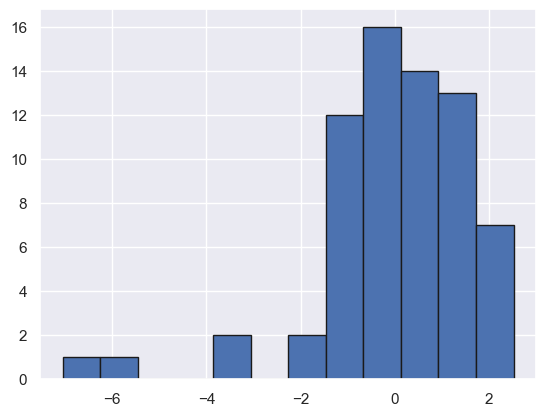

In [51]:
#1 NORMALITY 
#code checks for normality and gives a general summary of the test with bargraph for visual judgement
import scipy.stats as stats
norm1 = stats.shapiro(mnps_model.resid) #CHECK FOR NORMALITY
#VISUALLY CHECKING IF THE ASSUMPTION OF NORMALITY IS MET  AND A SUMMARY OF THE OUTPUT

if norm1.pvalue < 0.05:
    print(round(norm1.pvalue,9), ": Data not normally distributed")
    plt.hist(mnps_model.resid, bins='auto', histtype='bar', ec='k') 
elif norm1.pvalue >= 0.05:
    print(round(norm1.pvalue,9), ": Data is normally distributed")
    plt.hist(mnps_model.resid, bins='auto', histtype='bar', ec='k')


In [54]:
#2 HOMOGENEITY OF VARIANCES
#run levene or Bartlett's test if the assumption of normality is violated and provide a summary of the test
if norm1.pvalue < 0.05:
    print("Summary: shapiro-wilk test", round(norm1.pvalue,9),",residualS are not normally distributed")
    mnps_lev = stats.levene(mnps_aov["Control_Weight"],mnps_aov["1 PE MPs/mL_Weight"],mnps_aov["10 PE MPs/mL_Weight"],mnps_aov["100 PE MPs/mL_Weight"]) #default center = median
    if mnps_lev.pvalue < 0.05:
        print("Summary: levene test, P-value:", mnps_lev.pvalue,",populations do not have equal variances")
    elif mnps_lev.pvalue >= 0.05:
        print("Summary: levene test, P-value:", mnps_lev.pvalue,",populations have equal variances")
#run bartlett test if the assumption of normality is not violated and provide a summary of the outcome
elif norm1.pvalue >= 0.05: 
    print("Summary: shapiro-wilk test", round(norm1.pvalue,9),", residuals are normally distributed")
    mnps_bart = stats.bartlett(mnps_aov["Control_Weight"],mnps_aov["1 PE MPs/mL_Weight"],mnps_aov["10 PE MPs/mL_Weight"],mnps_aov["100 PE MPs/mL_Weight"])
    if mnps_bart.pvalue < 0.05:
        print("Summary: bartlett test, P-value: ", mnps_bart.pvalue,",populations do not have equal variances")
    elif mnps_bart.pvalue >= 0.05:
        print("Summary: bartlett test, P-value: ", mnps_bart.pvalue,",populations have equal variances")
    

Summary: shapiro-wilk test 1.853e-06 ,residualS are not normally distributed
Summary: levene test, P-value: 0.49354959610644145 ,populations have equal variances


In [55]:
#test if there is sifinificatnt difference in ranks when in groups and not normally distributed
mnps_kruskal = stats.kruskal(mnps_aov['Control_Weight'],mnps_aov['1 PE MPs/mL_Weight'], mnps_aov['10 PE MPs/mL_Weight'], mnps_aov['100 PE MPs/mL_Weight'])
mnps_kruskal

KruskalResult(statistic=36.820326817348835, pvalue=5.0222654803347145e-08)

## GENE EXPRESSION

In [21]:
#importing data
mnpgene = pd.read_csv("GENE_EX.csv")

In [22]:
mnpgene.head() #viewing fist 5 row of the data

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene
0,17119.520240,-0.266836,0.284693,-0.937275,0.348617,0.602675,ENO1
1,4706.550818,-0.529773,0.327682,-1.616728,0.105937,0.276062,MTATP6P1
2,5193.607288,0.435464,0.122705,3.548872,0.000387,0.004651,CLSTN1
3,22753.900970,0.364604,0.345000,1.056823,0.290592,0.543192,CLIC4
4,3902.850620,-0.189355,0.149950,-1.262784,0.206667,0.427057,CAPZB


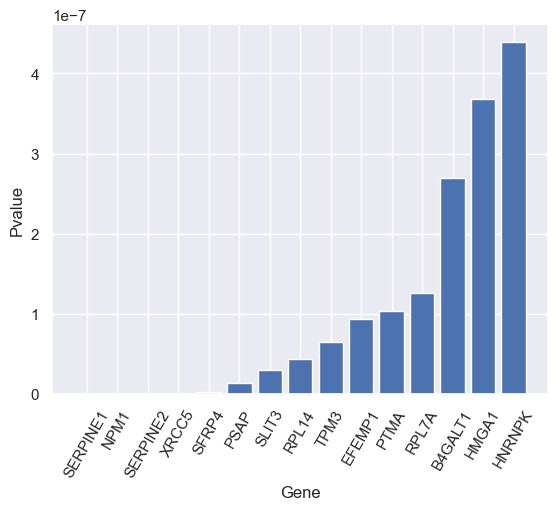

In [56]:
#visualizing top 15 expressed genes based on the pvalue
sort_mnp_sort = mnpgene.sort_values(by="pvalue",ascending=True)
first15 = 15
plt.bar(sort_mnp_sort['Gene'] [:first15], sort_mnp_sort['pvalue'][:first15])
plt.xticks(rotation = 60)
plt.xlabel("Gene")
plt.ylabel("Pvalue")
plt.show()


In [24]:
#adding a new column for geneexpressio anaysis
mnpgene["-log10(pvalue)"] = -np.log10(mnpgene["pvalue"])

In [25]:
#Creating an adjustable thresholds for significance
log2FC_threshold = 1.0
pvalue_threshold = 0.05

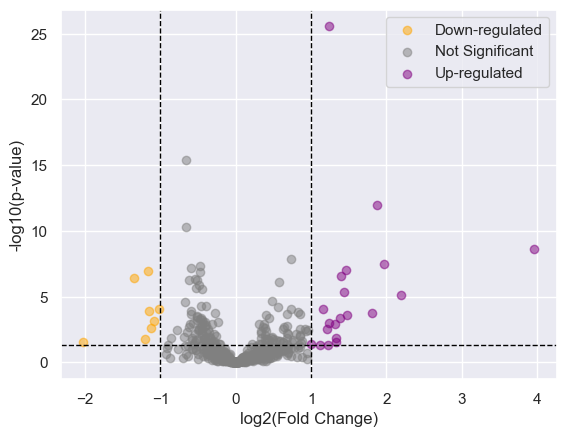

In [57]:
#Creating a vvolcano plot of the expressed genes
# generating x and y coordinates for non-significant genes
ns_x =  mnpgene[abs(mnpgene["log2FoldChange"]) < log2FC_threshold]["log2FoldChange"]
ns_y = mnpgene[abs(mnpgene["log2FoldChange"]) < log2FC_threshold]["-log10(pvalue)"]

# generating x and y coordinates for significant points (up-regulated)
nsup_x = mnpgene[(mnpgene["log2FoldChange"] >= log2FC_threshold) & (mnpgene["pvalue"] < pvalue_threshold)]["log2FoldChange"],
nsup_y = mnpgene[(mnpgene["log2FoldChange"] >= log2FC_threshold) & (mnpgene["pvalue"] < pvalue_threshold)]["-log10(pvalue)"],

# generating x and y coordinates for significant points (down-regulated)
nsd_x = mnpgene[(mnpgene["log2FoldChange"] <= -log2FC_threshold) & (mnpgene["pvalue"] < pvalue_threshold)]["log2FoldChange"],
nsd_y = mnpgene[(mnpgene["log2FoldChange"] <= -log2FC_threshold) & (mnpgene["pvalue"] < pvalue_threshold)]["-log10(pvalue)"],

#plotting expressed genes
plt.scatter(nsd_x,nsd_y, color="orange", alpha=0.5,label="Down-regulated")
plt.scatter(ns_x, ns_y, color="gray",alpha=0.5,label="Not Significant")
plt.scatter(nsup_x,nsup_y, color="purple",alpha=0.5, label="Up-regulated")

# plotting the  thresholds lines
plt.axvline(x=log2FC_threshold, color="black", linestyle="--", linewidth=1)
plt.axvline(x=-log2FC_threshold, color="black", linestyle="--", linewidth=1)
plt.axhline(y=-np.log10(pvalue_threshold), color="black", linestyle="--", linewidth=1)

# adding  labels and title to the plot
plt.xlabel("log2(Fold Change)")
plt.ylabel("-log10(p-value)")
#plt.title("Volcano Plot of Defrentially ")
plt.legend()

# Show the plot
plt.show()

In [58]:
#Names of the significantly expressed genes

# Generating significantly up-regulated genes and sorting based on the -log10(pvalue)
upregulated_genes = mnpgene[(mnpgene["log2FoldChange"] > log2FC_threshold) & (mnpgene["pvalue"] < pvalue_threshold)]
upregulated_genes_sorted = upregulated_genes.sort_values(by="-log10(pvalue)", ascending=False)

#Generating significantly down-regulated genes and sorting based on the -log10(pvalue)
downregulated_genes = mnpgene[(mnpgene["log2FoldChange"] < -log2FC_threshold) & (mnpgene["pvalue"] < pvalue_threshold)]
downregulated_genes_sorted = downregulated_genes.sort_values(by="-log10(pvalue)", ascending=False)


In [59]:
#showing the names of the significantly expressed genes
print("Up-regulated Genes (sorted by -log10(pvalue)):")
print(upregulated_genes_sorted[["Gene", "-log10(pvalue)"]])

print("\nDown-regulated Genes (sorted by -log10(pvalue)):")
print(downregulated_genes_sorted[["Gene", "-log10(pvalue)"]])

Up-regulated Genes (sorted by -log10(pvalue)):
         Gene  -log10(pvalue)
220  SERPINE1       25.552842
86   SERPINE2       11.958607
217     SFRP4        8.612610
178     SLIT3        7.518557
62     EFEMP1        7.031050
293   B4GALT1        6.570248
107      HEG1        5.333482
406     THBS1        5.110698
349     P4HA1        4.087778
260       CLU        3.767932
303      FTH1        3.614238
41       ECM1        3.344019
273      PLAT        2.973599
240    IGFBP3        2.914010
309    PRSS23        2.519854
213      CCN2        1.866764
263     SULF1        1.537846
183       LOX        1.368030
128    CCDC80        1.353719
115     PLOD2        1.344731

Down-regulated Genes (sorted by -log10(pvalue)):
          Gene  -log10(pvalue)
92        PTMA        6.987163
193      HMGA1        6.434152
238  HNRNPA2B1        4.040005
372    HNRNPA1        3.880378
292     TUBB4B        3.169495
90        ODC1        2.600057
99      COL6A3        1.815076
5          WLS        1.5